# DraCor API Tutorial

## 0. Import libraries

To use the [DraCor-API](https://dracor.org/doc/api) we need to send HTTP-Requests to the API: `https://dracor.org/api`. In Python HTTP-Request can be sent with the library `requests` (https://requests.readthedocs.io). We have to import this library:

In [3]:
import requests

To fascilitate the work with the metadata of the corpora in DraCor, we can use the library `pandas` (https://pandas.pydata.org/docs/). To be able to plot data with pandas, we also need to import the library `matplotlib` (https://matplotlib.org/). The libraries are imported below:

In [4]:
import pandas as pd
import matplotlib

## 1. Basic API calls without selected parameters

## `/info`: Info about the API 
We can get information about the API and DraCor data by sending **GET requests** to the API. 

For this, we take the base URL, saved in the variable `API_URL` below:

In [5]:
# save base URL in variable  
API_URL = "https://dracor.org/api/v1/"

We can then extend the URL to ask for specific information. If we want to know more about the API itself, we can use the parameter `info/` saved in the variable `INFO_EXTENSION`.


This will give us:
* name
* version
* status
* the version of the database ("existdb")

The documentation of this endpoint can be found here: https://dracor.org/doc/api#/public/api-info

In [6]:
# to get the info we extend the API URL by the parameter "info"
# save "info" parameter in variable
INFO_EXTENSION = "info"

# add extension to the base URL
api_info_url = API_URL + INFO_EXTENSION

# perform get request
r = requests.get(api_info_url)
r.text

'{\n  "name" : "DraCor API v1",\n  "version" : "1.0.2",\n  "status" : "stable",\n  "existdb" : "6.2.0",\n  "base" : "https://dracor.org/api/v1"\n}'

The API returns the information in the JSON format, which we have to parse. We can call `.json()` on the request object.

In [7]:
# read response as JSON
parsed_response = r.json()
parsed_response

{'name': 'DraCor API v1',
 'version': '1.0.2',
 'status': 'stable',
 'existdb': '6.2.0',
 'base': 'https://dracor.org/api/v1'}

As the response is a dictionary object, we can e.g. get the current version of the API by accessing it with the keyword "version".

In [8]:
print(f"The current version of the Dracor-API is {parsed_response['version']}.")

The current version of the Dracor-API is 1.0.2.


## `corpora/`: List available corpora 

With the extension `corpora/` saved in `CORPORA_EXT_PLAIN` we can display the list of corpora available in DraCor. 

The documentation of this endpoint can be found here: https://dracor.org/doc/api#/public/list-corpora

In [9]:
# save "corpora" parameter in variable
CORPORA_EXT_PLAIN = "corpora"
# add parameter to base URL to get information about the DraCor corpora 
api_corpora_url = API_URL + CORPORA_EXT_PLAIN
print(f"URL for getting the list of corpora: {api_corpora_url}\n")

# perform API request
# parse response with .json
corpus_list = requests.get(api_corpora_url).json()

#save corpus abbreviations in a list for later checking 
corpus_abbreviations = []

# iterate through corpus list and print information
for corpus_description in corpus_list:
    name = corpus_description["name"]
    print(f'{name}: {corpus_description["title"]}')
    corpus_abbreviations.append(name)

URL for getting the list of corpora: https://dracor.org/api/v1/corpora

als: Alsatian Drama Corpus
am: American Drama Corpus
bash: Bashkir Drama Corpus
cal: Calderón Drama Corpus
dutch: Dutch Drama Corpus
eng: English Drama Corpus
fre: French Drama Corpus
ger: German Drama Corpus
gersh: German Shakespeare Drama Corpus
greek: Greek Drama Corpus
hun: Hungarian Drama Corpus
ita: Italian Drama Corpus
pol: Polish Drama Corpus
rom: Roman Drama Corpus
rus: Russian Drama Corpus
shake: Shakespeare Drama Corpus
span: Spanish Drama Corpus
swe: Swedish Drama Corpus
tat: Tatar Drama Corpus
u: Ukrainian Drama Corpus
yi: Yiddish Drama Corpus


### Include corpora metrics
To not only get the abbreviation and the name of corpora but also information about the number of speakers, the word count etc. we can change our API call so that these metrics are included in the response. We can do so by 
* adding a `?` to indicate that we will pass a key-value pair to the API
* add the key-value pair like this `include=metrics`

URL for getting the list of corpora with metrics included: https://dracor.org/api/v1/corpora?include=metrics

Abbreviation: Corpus Name (Number of plays)
als: Alsatian Drama Corpus (30)
am: American Drama Corpus (40)
bash: Bashkir Drama Corpus (3)
cal: Calderón Drama Corpus (205)
dutch: Dutch Drama Corpus (180)
eng: English Drama Corpus (434)
fre: French Drama Corpus (1940)
ger: German Drama Corpus (715)
gersh: German Shakespeare Drama Corpus (38)
greek: Greek Drama Corpus (40)
hun: Hungarian Drama Corpus (74)
ita: Italian Drama Corpus (139)
pol: Polish Drama Corpus (50)
rom: Roman Drama Corpus (36)
rus: Russian Drama Corpus (212)
shake: Shakespeare Drama Corpus (37)
span: Spanish Drama Corpus (25)
swe: Swedish Drama Corpus (68)
tat: Tatar Drama Corpus (3)
u: Ukrainian Drama Corpus (40)
yi: Yiddish Drama Corpus (3)


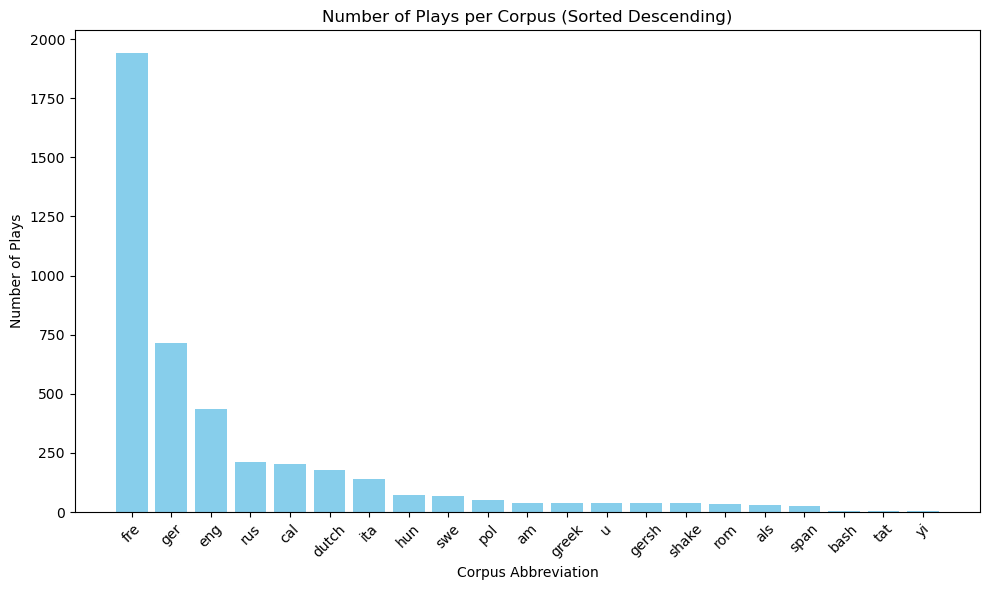

In [10]:
import requests
import matplotlib.pyplot as plt

# Define URL parameters
METRICS_PARAM_EXT = "?include=metrics"
api_corpora_metrics_urls = api_corpora_url + METRICS_PARAM_EXT
print(f"URL for getting the list of corpora with metrics included: {api_corpora_metrics_urls}\n")

# Perform API request
corpora_metrics = requests.get(api_corpora_metrics_urls).json()

# Initialize a list to store tuples of (abbreviation, number of plays)
data = []

# Iterate through corpus list, print information, and collect data
print("Abbreviation: Corpus Name (Number of plays)")
for corpus in corpora_metrics:
    abbreviation = corpus['name']
    num_of_plays = corpus['metrics']['plays']
    data.append((abbreviation, num_of_plays))
    print(f"{abbreviation}: {corpus['title']} ({num_of_plays})")

# Sort data from more to less plays (descending order)
data_sorted = sorted(data, key=lambda x: x[1], reverse=True)

# Unpack sorted data into two lists for plotting
sorted_abbreviations, sorted_plays = zip(*data_sorted)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_abbreviations, sorted_plays, color='skyblue')
plt.xlabel('Corpus Abbreviation')
plt.ylabel('Number of Plays')
plt.title('Number of Plays per Corpus (Sorted Descending)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Save the graph as a JPEG file
plt.savefig("corpora_plays.jpg", format="jpg")

# Display the plot
plt.show()


## 2. API calls with selected parameters
To get more information than included in the corpus metrics for a specific corpus, we first need to select a corpus from the list above. 

###  1. Choose a  `corpusname/`
To choose a corpus in the field below, type the abbreviation of the corpus as listed above.
The name you choose is saved in the variable `corpusname`.

The documentation of this endpoint can be found here: https://dracor.org/doc/api#/public/list-corpus-content

In [11]:
# Choose a corpus 
# to use the interactive mode in Jupyter Lab change the type of the following cell to "Code"
# The cell is not included in the HTML rendering

corpusname = "cal"

for i in range(10):
    # get corpusname with user input
    # save corpusname in variable
    corpusname = str(input("Please choose a corpusname from the list above. Enter the abbreviation: "))
    if corpusname not in corpus_abbreviations:
        print("The abbreviation you selected is not in the list. Please enter the abbreviation again.")
    else:
        print("Success!")
        break
else:
    corpusname = "swe"

In [12]:
# save corpora parameter (with slash) and metadata parameter in variables
CORPORA_EXT = "corpora/"
METADAT_EXT = "/metadata"

# build URL
corpus_metadata_path = API_URL + CORPORA_EXT + corpusname + METADAT_EXT
print(f"URL for getting the metadata of a specific corpus: {corpus_metadata_path}\n")


# perform request
metadata_file = requests.get(corpus_metadata_path, headers={"accept": "text/csv"}, stream=True)
metadata_file.raw.decode_content=True

# read metadata to DataFrame
metadata_df = pd.read_csv(metadata_file.raw, sep=",", encoding="utf-8")

URL for getting the metadata of a specific corpus: https://dracor.org/api/v1/corpora/cal/metadata



### Inspect metadata

In [13]:
# display first five lines of the retrieved metadata 
metadata_df.head()

# Save the DataFrame to a CSV file
metadata_df.to_csv("corpus_metadata.csv", index=False)
print("Metadata saved to corpus_metadata.csv")

Metadata saved to corpus_metadata.csv


Look at information available in the metadata 

In [14]:
# print column names available in meta data 
metadata_df.columns

Index(['name', 'id', 'wikidataId', 'firstAuthor', 'numOfCoAuthors', 'title',
       'subtitle', 'normalizedGenre', 'digitalSource',
       'originalSourcePublisher', 'originalSourcePubPlace',
       'originalSourceYear', 'originalSourceNumberOfPages', 'yearNormalized',
       'size', 'libretto', 'averageClustering', 'density', 'averagePathLength',
       'maxDegreeIds', 'averageDegree', 'diameter', 'datePremiered',
       'yearPremiered', 'yearPrinted', 'maxDegree', 'numOfSpeakers',
       'numOfSpeakersFemale', 'numOfSpeakersMale', 'numOfSpeakersUnknown',
       'numOfPersonGroups', 'numConnectedComponents', 'numEdges',
       'yearWritten', 'numOfSegments', 'wikipediaLinkCount', 'numOfActs',
       'wordCountText', 'wordCountSp', 'wordCountStage', 'numOfP', 'numOfL'],
      dtype='object')

### 3. What to do with the metadata - Examples

The library pandas allows us to plot selected columns against each other. If we want to see if one parameter e.g. the number of characters (as in 1) develops over time, we can set the x-axis to the years the plays were created ("yearNormalized) and the y-axis to the number of characters ("size") in the play. 

The documentation of the `plot` function can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

1. Plot the number of characters ("size") in the plays over time ("yearNormalized")

2. Plot the length of the play ("wordCountText") over time ("yearNormalized")

3. Get the five longest plays
    * sort plays by "wordCountText"
    * show first five
    
4. Get number of plays published after 1800 and before 1900
    * filter: "yearNormalized"
    * filter-value: 1800 and 1900
    * filter-operation: > and <
    
5. Plot development of the length of stage descriptions
    * filter: 'wordCountStage'
    * calculate percentage of stage directions in relation to wordcount in new column
    * plot by time 
    
6. Plot the relation of female speakers over time 
    * filter: 'numOfSpeakers', 'numOfSpeakersFemale'
    * calculate percentage of female speakers
    * plot by time   

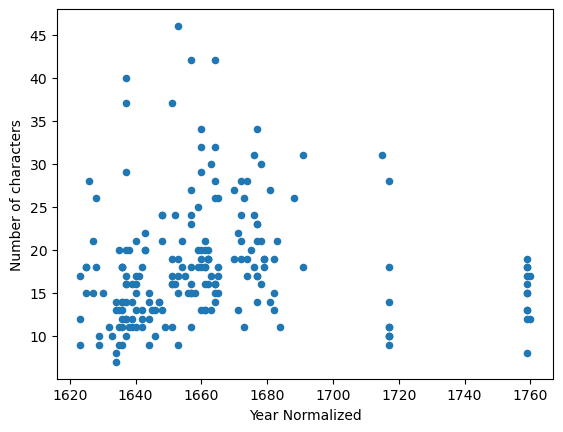

In [15]:
import matplotlib.pyplot as plt

# Plot the scatter chart using the DataFrame's built-in plot function
ax = metadata_df.plot(x="yearNormalized", y="size", kind="scatter")

# Set custom axis labels
ax.set_xlabel("Year Normalized")
ax.set_ylabel("Number of characters")

# Save the figure as a JPEG file before showing it
plt.savefig("characters_vs_year.jpg", format="jpg")

# Display the plot
plt.show()


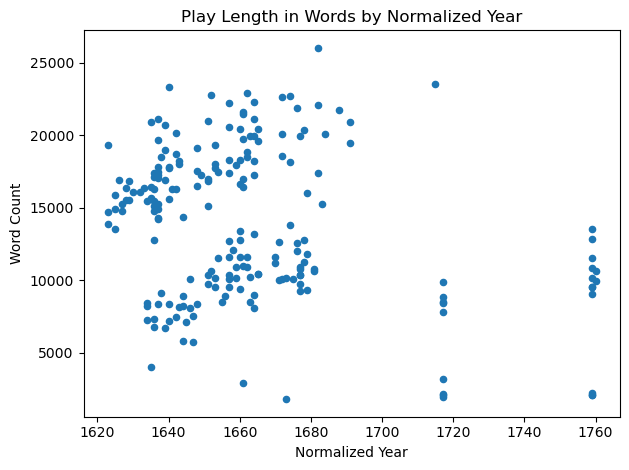

In [31]:
import matplotlib.pyplot as plt

# Create the scatter plot
ax = metadata_df.plot(x="yearNormalized", y="wordCountText", kind="scatter")

# Set custom axis labels for normalized values
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Word Count")
ax.set_title("Play Length in Words by Normalized Year")

# Adjust the layout to ensure labels and title fit
plt.tight_layout()

# Save the graph as a JPEG file
plt.savefig("play_length_by_year.jpg", format="jpg")

# Display the plot
plt.show()


In [16]:
# 3. Sort plays by wordcount, show first 5 entries
metadata_by_length = metadata_df.sort_values(by="wordCountText", axis=0, ascending=False)

# get the first five entries 
metadata_by_length[0:5]

,name,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,numEdges,yearWritten,numOfSegments,wikipediaLinkCount,numOfActs,wordCountText,wordCountSp,wordCountStage,numOfP,numOfL
108,hado-y-divisa-de-leonido-y-marfisa,cal000109,NaN,Calderón,0,Hado y divisa de Leonido y Marfisa,NaN,NaN,NaN,NaN,...,136,1680,87,NaN,3,26037,25090,1122,0,5172
14,auristela-y-lisidante,cal000063,NaN,Calderón,0,Auristela y Lisidante,La Gran Comedia. Fiesta Que Se Representó A Su...,NaN,NaN,NaN,...,254,NaN,77,NaN,3,23529,22907,749,0,4735
156,las-manos-blancas-no-ofenden,cal000127,NaN,Calderón,0,Las manos blancas no ofenden,Comedia Famosa,NaN,NaN,NaN,...,105,1640,80,NaN,3,23364,22867,516,0,4760
27,dicha-y-desdicha-del-nombre,cal000074,NaN,Calderón,0,Dicha y desdicha del nombre,Comedia Famosa,NaN,NaN,NaN,...,89,NaN,108,NaN,3,22918,22384,661,0,4588
121,la-fiera-el-rayo-y-la-piedra,cal000028,Q5966696,Calderón,0,"La fiera, el rayo y la piedra",NaN,NaN,http://www.cervantesvirtual.com/obra-visor/la-...,NaN,...,199,1652,91,1.0,3,22809,22210,601,0,4551


In [17]:
# 4. Get number of plays between 1620 and 1680 
num_of_plays = len(metadata_df[(metadata_df["yearNormalized"] > 1620) & (metadata_df["yearNormalized"] < 1681)])
print(f"Number of plays in the selected time period: {num_of_plays}")

Number of plays in the selected time period: 172


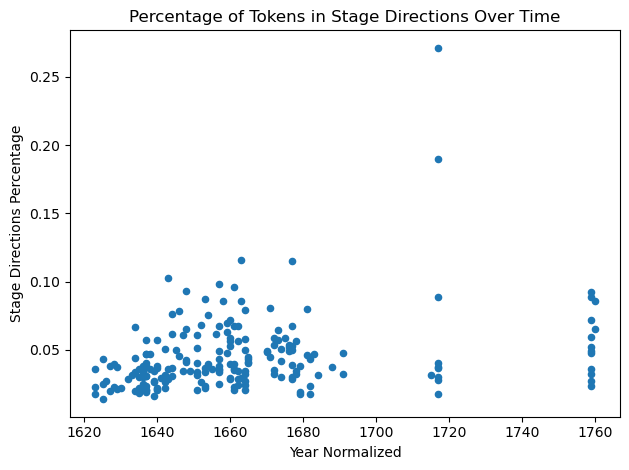

In [18]:
import matplotlib.pyplot as plt

# Calculate percentage of tokens in stage directions in relation to all tokens
stage_percentage = metadata_df["wordCountStage"] / metadata_df["wordCountText"]
metadata_df["wordCountStagePercentage"] = stage_percentage

# Create the scatter plot
ax = metadata_df.plot(x="yearNormalized", y="wordCountStagePercentage", kind="scatter")

# Optionally, customize axis labels
ax.set_xlabel("Year Normalized")
ax.set_ylabel("Stage Directions Percentage")
ax.set_title("Percentage of Tokens in Stage Directions Over Time")

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save the graph as a JPEG file
plt.savefig("stage_directions_percentage.jpg", format="jpg")

# Display the plot
plt.show()


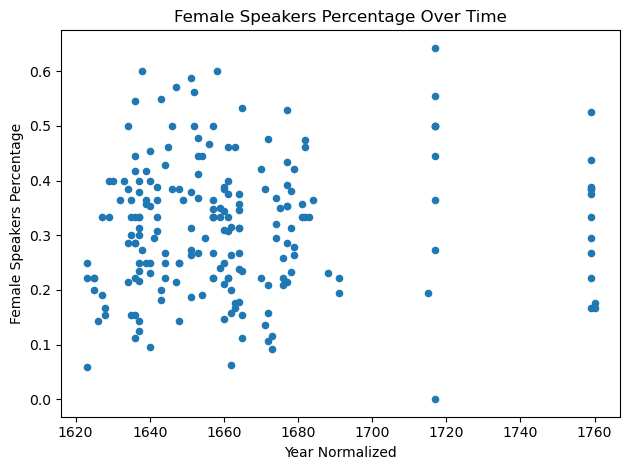

Results saved to female_speakers_percentage.csv


In [52]:
import matplotlib.pyplot as plt

# Calculate the percentage of female speakers
speakers_total = metadata_df["numOfSpeakers"]
metadata_df["numOfSpeakersFemalePercentage"] = metadata_df["numOfSpeakersFemale"] / speakers_total

# Create the scatter plot
ax = metadata_df.plot(x="yearNormalized", y="numOfSpeakersFemalePercentage", kind="scatter")

# Customize the plot
ax.set_xlabel("Year Normalized")
ax.set_ylabel("Female Speakers Percentage")
ax.set_title("Female Speakers Percentage Over Time")
plt.tight_layout()

# Save the graph as a JPEG file
plt.savefig("female_speakers_percentage.jpg", format="jpg")
plt.show()

# Create a results DataFrame with the title included
results_df = metadata_df[["yearNormalized", "title", "numOfSpeakersFemalePercentage"]]

# Save the results to a CSV file
results_df.to_csv("female_speakers_percentage.csv", index=False)
print("Results saved to female_speakers_percentage.csv")


## 3.  `play/`: Select text
The API also allows us to load single texts or abstract representation such as network data of single texts.
For this we need to extend the URL by the parameter `play/`, followed by the name of the play as listed in metadata. This will give us:
* metadata of the play
* network data to the play
* speaker list
* division into scenes and the appearing speakers

The documentation of this endpoint can be found here: https://dracor.org/doc/api#/public/play-info

In [53]:
# save play parameter in variable
PLAY_EXT = "/plays/"

In [70]:
# Choose a play 
# to use the interactive mode in Jupyter Lab change the type of the following cell to "Code"
# The cell is not included in the HTML rendering

play_name = "la-vida-es-sueno"

# save column name in which the play names are stored in a variable 
PLAY_KEY = "name"
for i in range(10):
    # get play name with user input
    # save play name in variable
    play_name = str(input("Please choose a text from the corpus you have chosen. Enter the text name: "))
    if play_name not in metadata_df[PLAY_KEY].values:
        print("The name you selected is not in the list. Please enter the name again.")
    else:
        print("Success!")
        break
else:
    play_name = "strindberg-gillets-hemlighet"

In [71]:
# build URL
play_path = API_URL + CORPORA_EXT + corpusname + PLAY_EXT + play_name
print(f"URL for getting information of a specific play: {play_path}\n")

# perform request
play_info = requests.get(play_path).json()

# extract character names
character_names = [entry["name"] for entry in play_info["characters"]]
print("Character list")
print(character_names)

URL for getting information of a specific play: https://dracor.org/api/v1/corpora/cal/plays/la-vida-es-sueno

Character list
['Rosaura', 'Clarín', 'Segismundo', 'Clotaldo', 'Soldados', 'Astolfo', 'Estrella', 'Basilio', 'Criado 2', 'Criado 1', 'Soldado 1', 'Soldado 2', 'Guardas']


### Exercise
* How else could we get the characters of the play? Is there a more specific API call if we only want that information?

In [77]:
# API call for getting a specific play is saved in the variable `play_path`
# This is it consists of 
print(API_URL)
print(CORPORA_EXT)
print(corpusname)
print(PLAY_EXT)
print(play_name)
print(f"Combined the URL looks like this: {play_path}")

https://dracor.org/api/v1/
corpora/
cal
/plays/
la-vida-es-sueno
Combined the URL looks like this: https://dracor.org/api/v1/corpora/cal/plays/la-vida-es-sueno


In [73]:
import requests
import pandas as pd

# Assume play_path and play_name are already defined
# For example:
# play_path = "https://api.example.com/plays/some_play"
# play_name = "Some_Play"

# Construct the URL for character information
character_url = play_path + "/characters"

# Perform the API request
character_info = requests.get(character_url)
if character_info.status_code != 200:
    print(f"It looks like your URL is not valid. Status code is: {character_info.status_code}")
else:
    print("Success! Here is the output:")
    data = character_info.json()
    print(data)
    
    # Convert the JSON data to a DataFrame
    df = pd.DataFrame(data)
    
    # Create a file name that includes the play name
    # Optionally, you can clean up the play_name to remove spaces or special characters
    filename = f"{play_name}_characters.csv"
    
    # Save the DataFrame to a CSV file with the new filename
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")


Success! Here is the output:
[{'id': 'rosaura', 'name': 'Rosaura', 'isGroup': False, 'gender': 'FEMALE', 'numOfScenes': 18, 'numOfSpeechActs': 92, 'numOfWords': 3487, 'degree': 9, 'weightedDegree': 33, 'closeness': 0.8, 'betweenness': 0, 'eigenvector': 0.22866514881148553}, {'id': 'clarín', 'name': 'Clarín', 'isGroup': False, 'gender': 'MALE', 'numOfScenes': 18, 'numOfSpeechActs': 55, 'numOfWords': 1311, 'degree': 12, 'weightedDegree': 54, 'closeness': 1, 'betweenness': 0.00883838383838384, 'eigenvector': 0.2919729553320794}, {'id': 'segismundo', 'name': 'Segismundo', 'isGroup': False, 'gender': 'MALE', 'numOfScenes': 25, 'numOfSpeechActs': 89, 'numOfWords': 4256, 'degree': 12, 'weightedDegree': 59, 'closeness': 1, 'betweenness': 0.00883838383838384, 'eigenvector': 0.2919729553320794}, {'id': 'clotaldo', 'name': 'Clotaldo', 'isGroup': False, 'gender': 'MALE', 'numOfScenes': 20, 'numOfSpeechActs': 96, 'numOfWords': 2719, 'degree': 12, 'weightedDegree': 50, 'closeness': 1, 'betweenness':

## Specify single play requests
We can specify which information of the play we want to retrieve. We do so by extending the URL by an additional parameter. If for example we want to get the spoken text of the characters, we need to extend the URL by `spoken-text-by-character`.

The documentation of this endpoint can be found here: https://dracor.org/doc/api#/public/play-spoken-text-by-character

You could also choose other information to retrieve e.g. stage directions and speakers, spoken text only (without the attribution to the speaker) and so on. Just have a look at the API documentation and see what parameters can be added after `{playname}`.

In [82]:
# save parameter to get more specific data to the selected play in a variable 
PLAY_SPECIFICATION = "/spoken-text-by-character"

In [83]:
# extend play URL 
play_spec_path = play_path + PLAY_SPECIFICATION
print(f"URL for getting specified information of a play: {play_spec_path}\n")

# perform request 
play_spec = requests.get(play_spec_path).json()

URL for getting specified information of a play: https://dracor.org/api/v1/corpora/cal/plays/la-vida-es-sueno/spoken-text-by-character



### Example
We can now perform some analyses with the text we retrieved. With just some minor preprocessing (tokenization) we can ask:
* Who talks most often about love or guns 


Since the characters are also annotated with gender with can explore simple gender related questions, such as:
* Do men talk more often about swords, guns, weapons?
* Do women talk more often about love, roses, children?

For this we need to import the natural language toolkit `nltk` (https://www.nltk.org/) or any other NLP library, e.g. spaCy to tokenize the spoken text. We can then calculate the frequencies by character and sum them up by gender. For counting the selected words, we can use the library `collections` (https://docs.python.org/3/library/collections.html)

In [84]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [85]:
# save keyword for a character's text in a variable
TEXT_KEY = "text"
# save new column names in variables
ANNO_KEY = "text annotation"
FRQ_KEY = "frequencies"

# tokenize and count words
# iterate characters
for character_entry in play_spec:
    # tokenize speech acts
    annotation =  [word_tokenize(sen) for sen in character_entry[TEXT_KEY]]
    # save tokenized text and word frequencies
    character_entry[ANNO_KEY] = [word for sen in annotation for word in sen]
    character_entry[FRQ_KEY] = Counter(character_entry[ANNO_KEY])

### Create word list
Create your list of words below. Each word must be placed in between strings ("word") and separated with a comma from the next word.

In [86]:
word_list = ["vida", "querer", "voz", "cielo", "amor", "morir", "monte", "muerte", "sol", "mar"]

### Analyze

In [87]:
# save character name key in a variable
NAME_KEY = "label"

# get frequencies of the words in the word list by character
# iterate characters
for character_entry in play_spec:
    # get character name
    print(character_entry[NAME_KEY])
    found = False
    # for each word in the word list, look up the frequency in the speech of the current character
    for word in word_list:
        if word in character_entry[FRQ_KEY]:
            print(f"{word}: {character_entry[FRQ_KEY][word]}")
            found = True
    if not found:
        print("None of the words found in the speech of this character.")
    print("-"*50)

Rosaura
vida: 15
voz: 3
cielo: 4
amor: 3
morir: 1
monte: 2
muerte: 5
sol: 4
--------------------------------------------------
Clarín
vida: 2
cielo: 2
morir: 2
monte: 4
muerte: 8
sol: 1
mar: 2
--------------------------------------------------
Segismundo
vida: 12
querer: 1
voz: 4
cielo: 10
amor: 1
morir: 2
monte: 1
muerte: 16
sol: 6
mar: 2
--------------------------------------------------
Clotaldo
vida: 11
voz: 1
cielo: 7
amor: 2
morir: 3
muerte: 11
--------------------------------------------------
None
None of the words found in the speech of this character.
--------------------------------------------------
Astolfo
vida: 2
voz: 1
cielo: 1
amor: 1
monte: 2
sol: 4
--------------------------------------------------
Estrella
vida: 1
voz: 1
amor: 3
sol: 2
--------------------------------------------------
Basilio
vida: 2
voz: 1
cielo: 6
amor: 2
morir: 2
monte: 2
muerte: 7
sol: 3
mar: 1
--------------------------------------------------
Criado 2
None of the words found in the speech of t

In [88]:
# save the gender key for the characters in a variable
GENDER_KEY = "gender"
# create results dictionary
# for each word the frequency by gender is saved 
words_by_gender = {word: {"MALE": 0, "FEMALE": 0, "UNKNOWN":0} for word in word_list}

# get frequencies of the words in the word list by character
# add frequency to the gender of the character

# iterate characters
for character_entry in play_spec:
    # retrieve gender
    gender = character_entry[GENDER_KEY]
    # for each word in the word list, look up the frequency in the speech of the current character
    # add frequency to the gender of the character
    for word in word_list:
        if word in character_entry[FRQ_KEY]:
            if gender in words_by_gender[word]:
                words_by_gender[word][gender] += character_entry[FRQ_KEY][word]
# convert results dictionary into a DataFrame
gender_df = pd.DataFrame(words_by_gender)

<Axes: >

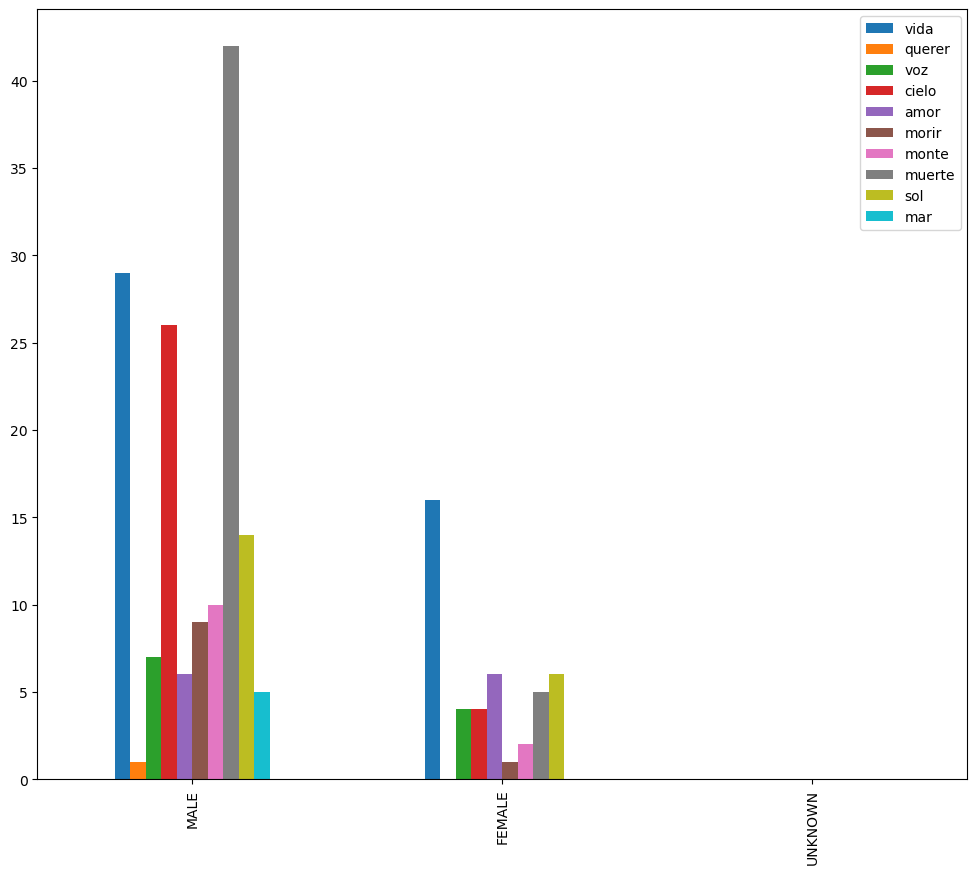

In [89]:
gender_df.plot(kind="bar", figsize=(12,10))

## Generic function to handle the requests and parse the result
Requesting data from the API in most cases follows a pattern:
 * construct the request-url. E.g. use `https://dracor.org/api/` as a base and attach `corpusname`, `playname`, a method, e.g. `characters` and in some cases a reponse-format, e.g. `csv`
 * use this constructed url in a request do the endpoint
 * retrieve the data and parse to a format, that can be than used in the program
 
By defining a function, this process can be speed up. Instead of repeating the code, a function can be defined, that takes `corpusname`, `playname` and `method` as arguments. In the example we assume, that the response will be JSON.

Parsing of JSON is done with the package `json` (https://docs.python.org/3/library/json.html), which needs to be imported:

In [90]:
import json

The function accepts parameters as arguments, e.g. `corpusname="ger"`. Following arguments are supported:

* `apibase` (default will be `https://dracor.org/api/`)
* `corpusname`
* `playname`
* `method`
* `parse_json`: `True`, `False` (default) – will parse the response as `json`


In [91]:
#corpusname:str -> []
def get(**kwargs):
    #corpusname=corpusname
    #playname=playname
    #apibase="https://dracor.org/api/"
    #method=method
    #parse_json: True
    
    #could set different apibase, e.g. https://staging.dracor.org/api/ [not recommended, pls use the production server]
    if "apibase" in kwargs:
        if kwargs["apibase"].endswith("/"):
            apibase = kwargs["apibase"]
        else:
            apibase = kwargs["apibase"] + "/"
    else:
        #use default
        apibase = "https://dracor.org/api/v1/"
    if "corpusname" in kwargs and "playname" in kwargs:
        # used for /api/corpora/{corpusname}/play/{playname}/
        if "method" in kwargs:
            request_url = apibase + "corpora/" + kwargs["corpusname"] + "/plays/" + kwargs["playname"] + "/" + kwargs["method"]
        else:
            request_url = apibase + "corpora/" + kwargs["corpusname"] + "/plays/" + kwargs["playname"]
    elif "corpusname" in kwargs and not "playname" in kwargs:
        if "method" in kwargs:
            request_url = apibase + "corpora/" + kwargs["corpusname"] + "/" + kwargs["method"]
        else:
            request_url = apibase + "corpora/" + kwargs["corpusname"] 
    elif "method" in kwargs and not "corpusname" in kwargs and not "playname" in kwargs:
            request_url = apibase + kwargs["method"]
            
    else: 
        #nothing set
        request = request_url = apibase + "info"
    
    #send the response
    r = requests.get(request_url)
    if r.status_code == 200:
        #success!
        if "parse_json" in kwargs:
            if kwargs["parse_json"] == True:
                json_data = json.loads(r.text)
                return json_data
            else:
                return r.text
        else:
            return r.text
    else:
        raise Exception("Request was not successful. Server returned status code: "  + str(r.status_code))
       

The function can now be called as follows below. The function call requests the Info about the API `/api/info`:

In [ ]:
get(method="info", parse_json=True)

To request the metrics of a single play (`/api/corpora/{corpusname}/play/{playname}/metrics`) use the following function call:

In [92]:
get(corpusname="cal",playname="la-vida-es-sueno",method="metrics",parse_json=True)

{'id': 'cal000037',
 'name': 'la-vida-es-sueno',
 'corpus': 'cal',
 'wikipediaLinkCount': 55,
 'nodes': [{'betweenness': 0.0016835016835016834,
   'degree': 10,
   'id': 'estrella',
   'closeness': 0.8571428571428571,
   'eigenvector': 0.250871119872442,
   'weightedDegree': 25},
  {'betweenness': 0.00883838383838384,
   'degree': 12,
   'id': 'segismundo',
   'closeness': 1,
   'eigenvector': 0.2919729553320794,
   'weightedDegree': 59},
  {'betweenness': 0.003367003367003367,
   'degree': 11,
   'id': 'criado-2',
   'closeness': 0.9230769230769231,
   'eigenvector': 0.2734003865896473,
   'weightedDegree': 28},
  {'betweenness': 0.00883838383838384,
   'degree': 12,
   'id': 'astolfo',
   'closeness': 1,
   'eigenvector': 0.2919729553320794,
   'weightedDegree': 40},
  {'betweenness': 0.00883838383838384,
   'degree': 12,
   'id': 'soldado-1',
   'closeness': 1,
   'eigenvector': 0.2919729553320794,
   'weightedDegree': 27},
  {'betweenness': 0.00883838383838384,
   'degree': 12,
   

## Example: Gender of Characters

In the following example we count characters that are tagged as "MALE" and "FEMALE in a corpus.

In [95]:
#Get all plays in a Corpus
if corpusname != "":
    #get data of a single corpus and store only the list of plays in the variable "plays"
    plays = get(corpusname=corpusname,parse_json=True)["plays"]
    #set counters for male an female characters in the corpus
    overallMale = 0
    overallFemale = 0
    #check, if a corpusname was entered
    if corpusname != "":
        #iterate over the plays
        for play in plays:
            #get the characters of a play by using the api endpoint /api/corpora/{corpusname}/play/{playname}/characters
            characters = get(corpusname=corpusname,playname=play["name"],method="characters",parse_json=True)
            #reset the counters for male and female characters
            cntMale = 0
            cntFemale = 0
            #iterate over the characters and increment the counters
            for character in characters:
                gender = character["gender"]
                if gender == "MALE":
                    cntMale = cntMale + 1
                elif gender == "FEMALE":
                    cntFemale = cntFemale + 1
            # report the result per play
            print(play["name"] + ": " + "female characters: " + str(cntFemale) + "; male characters: " + str(cntMale))
        
            # increment the overall counters
            overallMale = overallMale + cntMale
            overallFemale = overallFemale + cntFemale
    # report the results on corpus level
    print("\n\nThere are " + str(overallFemale) + " female and " + str(overallMale) + " male characters in the corpus '" + corpusname + "'")
    
else:
    raise Exception("Please enter a corpus!")


la-universal-redencion: female characters: 8; male characters: 5
la-iglesia-sitiada: female characters: 6; male characters: 4
el-primer-blason-del-austria-auto: female characters: 2; male characters: 11
el-gran-duque-de-gandia: female characters: 5; male characters: 6
el-divino-jason-attributed: female characters: 2; male characters: 6
el-convite-general: female characters: 6; male characters: 14
un-castigo-en-tres-venganzas: female characters: 3; male characters: 10
tu-projimo-como-a-ti: female characters: 7; male characters: 10
triunfar-muriendo: female characters: 5; male characters: 7
tambien-hay-duelo-en-las-damas: female characters: 4; male characters: 9
suenos-hay-que-verdad-son: female characters: 6; male characters: 20
saber-del-mal-y-el-bien: female characters: 4; male characters: 9
quien-hallara-mujer-fuerte: female characters: 10; male characters: 10
psiquis-y-cupido-toledo: female characters: 6; male characters: 4
psiquis-y-cupido-que-escribio-para-esta-villa-de-madrid: fe